In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error

In [2]:
!git clone https://github.com/illliyas/Machine-Learning.git

Cloning into 'Machine-Learning'...
remote: Enumerating objects: 1613, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 1613 (delta 15), reused 0 (delta 0), pack-reused 1583
Receiving objects: 100% (1613/1613), 278.13 MiB | 25.61 MiB/s, done.
Resolving deltas: 100% (39/39), done.
Checking out files: 100% (1537/1537), done.


In [85]:
data = pd.read_csv('Machine-Learning/AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [24]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [86]:
data.rename(columns={'#Passengers':'passengers'},inplace=True)
data = data['passengers']
data=np.array(data).reshape(-1,1)

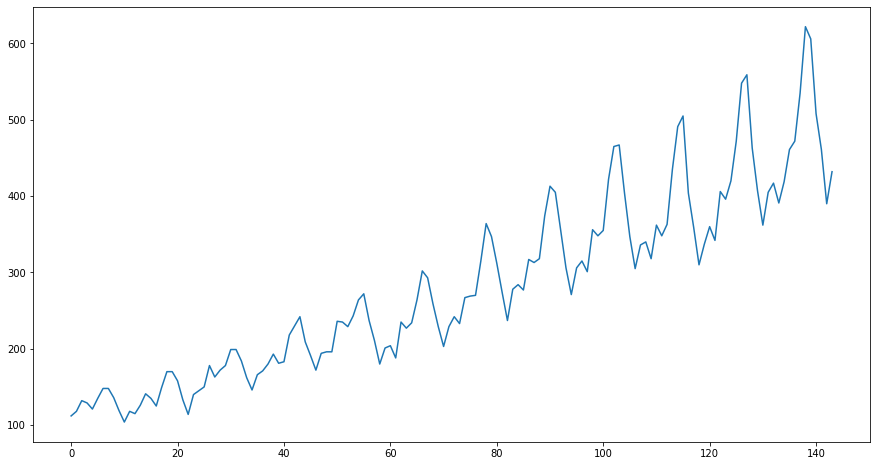

In [26]:
plt.figure(figsize=(15,8))
plt.plot(data)

**Feature** **Scaling**

In [96]:
scaler= MinMaxScaler()
data=scaler.fit_transform(data)

In [97]:
train_size=100
test_size=44

In [98]:
train=data[0:train_size,:]
test=data[train_size:,:]

In [90]:
train.shape

(71, 1)

In [91]:
test.shape

(73, 1)

In [99]:
def get_data(data, look_back):
    dataX, dataY = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(data[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [34]:
train

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [100]:
look_back = 10
X_train, y_train = get_data(train, look_back)

In [70]:
X_train

array([[0.01544402, 0.02702703, 0.05405405, 0.04826255, 0.03281853,
        0.05984556, 0.08494208, 0.08494208, 0.06177606, 0.02895753],
       [0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984556,
        0.08494208, 0.08494208, 0.06177606, 0.02895753, 0.        ],
       [0.05405405, 0.04826255, 0.03281853, 0.05984556, 0.08494208,
        0.08494208, 0.06177606, 0.02895753, 0.        , 0.02702703],
       [0.04826255, 0.03281853, 0.05984556, 0.08494208, 0.08494208,
        0.06177606, 0.02895753, 0.        , 0.02702703, 0.02123552],
       [0.03281853, 0.05984556, 0.08494208, 0.08494208, 0.06177606,
        0.02895753, 0.        , 0.02702703, 0.02123552, 0.04247104],
       [0.05984556, 0.08494208, 0.08494208, 0.06177606, 0.02895753,
        0.        , 0.02702703, 0.02123552, 0.04247104, 0.07142857],
       [0.08494208, 0.08494208, 0.06177606, 0.02895753, 0.        ,
        0.02702703, 0.02123552, 0.04247104, 0.07142857, 0.05984556],
       [0.08494208, 0.06177606, 0.0289575

In [71]:
y_train

array([0.        , 0.02702703, 0.02123552, 0.04247104, 0.07142857,
       0.05984556, 0.04054054, 0.08687259, 0.12741313, 0.12741313,
       0.1042471 , 0.05598456, 0.01930502, 0.06949807, 0.07915058,
       0.08880309, 0.14285714, 0.11389961, 0.13127413, 0.14285714,
       0.18339768, 0.18339768, 0.15444015, 0.11196911, 0.08108108,
       0.11969112, 0.12934363, 0.14671815, 0.17181467, 0.14864865,
       0.15250965, 0.22007722, 0.24324324, 0.26640927, 0.2027027 ,
       0.16795367, 0.13127413, 0.17374517, 0.17760618, 0.17760618,
       0.25482625, 0.25289575, 0.24131274, 0.26833977, 0.30888031,
       0.32432432, 0.25675676, 0.20656371, 0.14671815, 0.18725869,
       0.19305019, 0.16216216, 0.25289575, 0.23745174, 0.25096525,
       0.30888031, 0.38223938, 0.36486486, 0.2992278 , 0.24131274,
       0.19111969, 0.24131274, 0.26640927, 0.24903475, 0.31467181,
       0.31853282, 0.32046332, 0.40733591, 0.5019305 , 0.46911197,
       0.4015444 , 0.32818533, 0.25675676, 0.33590734, 0.34749

In [101]:
X_test, y_test = get_data(test, look_back)

In [102]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [103]:
X_train.shape

(89, 10, 1)

In [ ]:
97 = No of samples
2 = time steps
1 = featue

In [75]:
look_back

10

**LSTM**

In [104]:
model = Sequential()
model.add(LSTM(10, input_shape = (look_back, 1)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [105]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 10)                480       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [106]:
model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
89/89 [==============================] - 2s 3ms/step - loss: 0.0283
Epoch 2/50
89/89 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 3/50
89/89 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 4/50
89/89 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 5/50
89/89 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 6/50
89/89 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 7/50
89/89 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 8/50
89/89 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 9/50
89/89 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 10/50
89/89 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 11/50
89/89 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 12/50
89/89 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 13/50
89/89 [==============================

In [107]:
y_pred = model.predict(X_test)

In [108]:
scaler.scale_

array([1.])

In [109]:
y_pred = scaler.inverse_transform(y_pred)

In [110]:
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

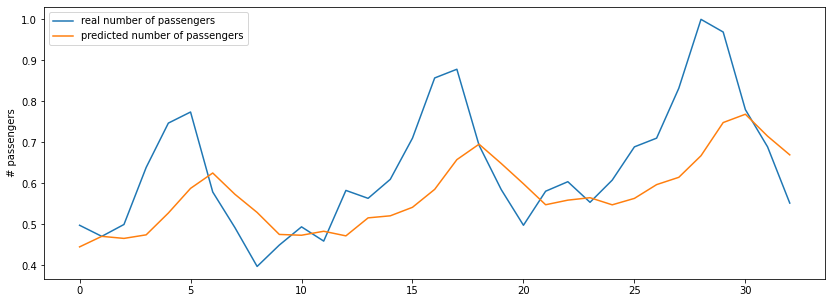

In [111]:
# plot baseline and predictions
plt.figure(figsize=(14,5))
plt.plot(y_test, label = 'real number of passengers')
plt.plot(y_pred, label = 'predicted number of passengers')
plt.ylabel('# passengers')
plt.legend()
plt.show()

In [112]:
y_pred[:,0]

array([0.44538152, 0.47106528, 0.46603343, 0.4747325 , 0.52792174,
       0.5880001 , 0.6254853 , 0.57356304, 0.52931726, 0.4756928 ,
       0.4737638 , 0.48344588, 0.47221208, 0.51610637, 0.5211054 ,
       0.54185253, 0.58558494, 0.65802985, 0.6956931 , 0.64856464,
       0.59920394, 0.5480803 , 0.55930406, 0.56525135, 0.5479024 ,
       0.56358105, 0.59714067, 0.61495554, 0.66757107, 0.7484492 ,
       0.7686953 , 0.71528083, 0.6696871 ], dtype=float32)

In [113]:
trainScore = math.sqrt(mean_squared_error(y_test, y_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, y_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.13 RMSE
Test Score: 0.13 RMSE
